# Problem Statement: 

Given the covid-19 situation, an important problem has emerged which is to detect whether a person is wearing a face mask or not. In this assignment, our goal will be to train a CNN to learn to distinguish whether mask is present on a given face image or not.

In [457]:
import tensorflow as tf #import required libraries for tensor flow

In [458]:
#import required libraries for models and layers from keras
from tensorflow.keras import models 
from tensorflow.keras import layers

In [459]:
#import required libraries for pandas and numpy 
import numpy as np
import pandas as pd
import random #To call random seed 
import os #To use dir command and get the list of files

In [460]:
#Import cv2 for image handling
import cv2 

In [461]:
#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [462]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 

# In case you need to run this python notebook at Google Colab.
1. Ensure your drive is trusted with notebook. 
2. Ensure dataset is available at /Colab_Notebooks/dataset directory inside your trusted google drive. 

Once above two requirements met, uncomment below two cells and comment out subsequent two cells. 

In [463]:
#from google.colab import drive
#drive.mount('/content/drive')

In [464]:
#Read the dataset
#train_masked_dir = 'drive/My Drive/Colab_Notebooks/dataset/train_validate/masked'
#train_unmasked_dir = 'drive/My Drive/Colab_Notebooks/dataset/train_validate/unmasked'
#test_masked_dir = 'drive/My Drive/Colab_Notebooks/dataset/test/masked'
#test_unmasked_dir = 'drive/My Drive/Colab_Notebooks/dataset/test/unmasked'
#directory='drive/My Drive/Convolutional_Neural_Networks/dataset/test_set',
#print (os.listdir("drive/My Drive/Colab_Notebooks/dataset")) #Check the directories

#train_masked_data = ['drive/My Drive/Colab_Notebooks/dataset/train_validate/masked/{}'.format(i) for i in os.listdir(train_masked_dir)]
#train_unmasked_data = ['drive/My Drive/Colab_Notebooks/dataset/train_validate/unmasked/{}'.format(i) for i in os.listdir(train_unmasked_dir)]
#test_masked_data = ['drive/My Drive/Colab_Notebooks/dataset/test/masked/{}'.format(i) for i in os.listdir(test_masked_dir)]
#test_unmasked_data = ['drive/My Drive/Colab_Notebooks/dataset/test/unmasked/{}'.format(i) for i in os.listdir(test_unmasked_dir)]

# Image Loading from local system:  
Load the images in appropriate data structures in your program, ready to be passed as input to the model for training. Consider input image size to be 64x64x3. [2 points]

In [465]:
#Read the dataset, assumption is dataset folder is available at the same dir location where python notebook is running
train_masked_dir = 'dataset/train_validate/masked'
train_unmasked_dir = 'dataset/train_validate/unmasked'
test_masked_dir = 'dataset/test/masked'
test_unmasked_dir = 'dataset/test/unmasked'

print (os.listdir("dataset")) #Check the directories for location



['test', 'train_validate']


Note: If user is not getting 'test', & 'train_validate' folders it means dataset folder is not having desired input content.
Do not proceed further and fix the directory problem first. 

In [466]:
#Get the Masked & UnMasted data from given directory set
train_masked_data = ['dataset/train_validate/masked/{}'.format(i) for i in os.listdir(train_masked_dir)]
train_unmasked_data = ['dataset/train_validate/unmasked/{}'.format(i) for i in os.listdir(train_unmasked_dir)]
test_masked_data = ['dataset/test/masked/{}'.format(i) for i in os.listdir(test_masked_dir)]
test_unmasked_data = ['dataset/test/unmasked/{}'.format(i) for i in os.listdir(test_unmasked_dir)]

In [467]:
#Print the length of given dataset
print ("Length of training data : Masked =  ",len(train_masked_data))
print ("Length of training data : Unmasked =  ",len(train_unmasked_data))
print ("Length of test data     : Masked =  ",len(test_masked_data))
print ("Length of test data     : Unmasked =  ",len(test_unmasked_data))

Length of training data : Masked =   887
Length of training data : Unmasked =   840
Length of test data     : Masked =   160
Length of test data     : Unmasked =   160


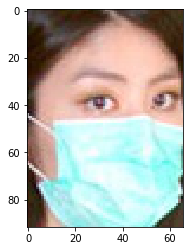

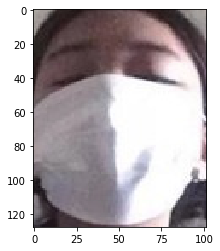

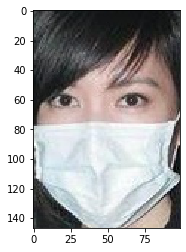

In [468]:
#Print the sample images to ensure data readiness
import matplotlib.image as mpimg
for image in train_masked_data[0:3]: #Print the first 3 masked images 
    img = mpimg.imread(image)
    imgplot = plt.imshow(img)
    plt.show()
    

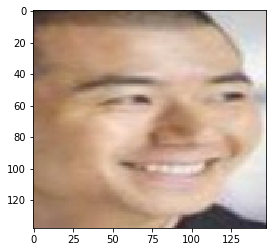

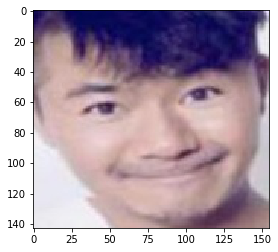

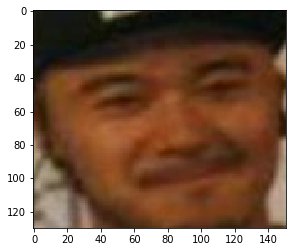

In [469]:
#Print the sample images to ensure data readiness
import matplotlib.image as mpimg
for image in train_unmasked_data[0:3]: #Print the first 3 unmasked images 
    img = mpimg.imread(image)
    imgplot = plt.imshow(img)
    plt.show()

In [470]:
#Declare image dimensions
nrows = 64
ncols = 64
channels = 3 #As the input dataset is colored image set, set to 1 for greyscale image

#Get the labels for Masked & Unmasked data for further processing 
X = [] #Images
y = [] #Labels
X_test = [] #Testing Images
y_test = [] #Testing labels

#Create the label based on the directory we are picking for image processing 
#Using 1 for Masked Images and 0 for Unmasked images
for image in train_masked_data:
    X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncols), interpolation=cv2.INTER_CUBIC))
    y.append(1) #1 for all masked images
for image in train_unmasked_data:
    X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncols), interpolation=cv2.INTER_CUBIC))
    y.append(0) #1 for all un_masked images
for image in test_masked_data:
    X_test.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncols), interpolation=cv2.INTER_CUBIC))
    y_test.append(1) #1 for all masked images
for image in test_unmasked_data:
    X_test.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncols), interpolation=cv2.INTER_CUBIC))
    y_test.append(0) #1 for all un_masked images

In [471]:
#Using dataframe to preseve the labels before shuffle operation
#Training Data frame
df = pd.DataFrame({'Image':X, 'Mask':y})
df = df.sample(frac=1).reset_index(drop=True) #Shuffle the dataframe 

#Test data frame
df_test = pd.DataFrame({'Image':X_test, 'Mask':y_test})
df_test = df_test.sample(frac=1).reset_index(drop=True) #Shuffle the dataframe 

In [472]:
df.head() #Check if shuffle operation worked for y label 
df_test.shape

(320, 2)

In [473]:
X = df["Image"].tolist() #Converting back to list
y= df["Mask"].tolist()

X_test = df_test["Image"].tolist() #Converting back to list
y_test = df_test["Mask"].tolist()

In [474]:
print (len(X)) #Total Images
print (len(y)) #Total Labels
print (type(X)) #Ensuring to preserve the type of dataset before & after shuffling operation
print (len(X_test)) #Total Testing Images
print (len(y_test)) #Total Testing Labels
print (type(X_test))


1727
1727
<class 'list'>
320
320
<class 'list'>


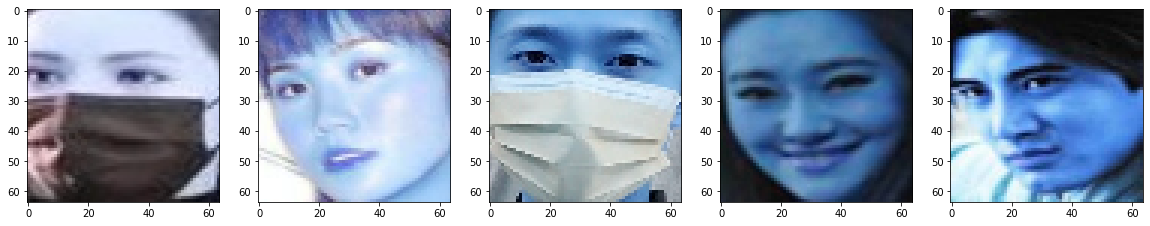

In [475]:
#Lets print the images after merge & shuffle using dataframe 
plt.figure(figsize=(20,10))
col = 5
for count in range (col):
    plt.subplot(5 / col + 1, col, count +1 )
    plt.imshow(X[count])

Note: Printed Input images are shuffled & mix of both masked & unmasked data.

Text(0.5, 1.0, 'Labels for Unmask & Mask')

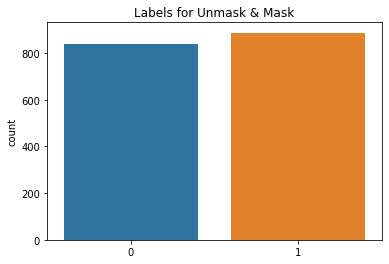

In [476]:
#Convert list into Array
X = np.array(X)
y = np.array(y)

#See the training dataset visually 
sns.countplot(y)
plt.title('Labels for Unmask & Mask')


Text(0.5, 1.0, 'Labels for Test data Unmask & Mask')

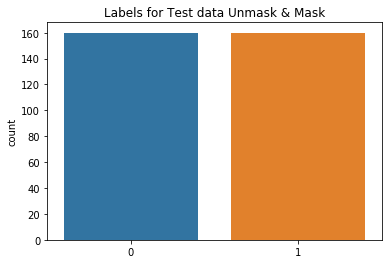

In [477]:
#Convert list into Array for Test Data
X_test = np.array(X_test)
y_test = np.array(y_test)
#See the test dataset visually 
sns.countplot(y_test)
plt.title('Labels for Test data Unmask & Mask')

In [478]:
#Lets check the labels are matching or not
print ("Length of training data : Masked =  ",len(train_masked_data))
print ("Length of training data : Unmasked =  ",len(train_unmasked_data))

#Lets check the labels are matching or not
print ("Length of test data : Masked =  ",len(test_masked_data))
print ("Length of test data : Unmasked =  ",len(test_unmasked_data))


Length of training data : Masked =   887
Length of training data : Unmasked =   840
Length of test data : Masked =   160
Length of test data : Unmasked =   160


In [479]:
#Look at the shape of our data 
print ("Shape of train images :", X.shape)
print ("Shape of labels images :", y.shape)

#Look at the shape of our test data 
print ("Shape of train images :", X_test.shape)
print ("Shape of labels images :", y_test.shape)

Shape of train images : (1727, 64, 64, 3)
Shape of labels images : (1727,)
Shape of train images : (320, 64, 64, 3)
Shape of labels images : (320,)


So finally the input training set is ready for modelling. Input image is a tensor of rank 4 and these 4 dimensional array is 1727 x 150 x 150 x 3 which is batch size, height, width and channels respectively. 

In [480]:
#Split the data into test and validation set 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

In [481]:
print ("Shape of Training Images   : ", X_train.shape)
print ("Shape of Validation Images : ", X_val.shape)
print ("Shape of training labels   : ", y_train.shape)
print ("Shape of validation labels : ", y_val.shape)

Shape of Training Images   :  (1381, 64, 64, 3)
Shape of Validation Images :  (346, 64, 64, 3)
Shape of training labels   :  (1381,)
Shape of validation labels :  (346,)


In [482]:
#Length of training & Validation data 
ntrain = len(X_train)
nval = len(X_val)
batch_size = 32

In [483]:
from keras import layers
from keras import models #For sequential model
from keras import optimizers #For back propogation optimizers
from keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing.image import img_to_array, load_img

# 2. Define Model 

Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned (eg, take pool size 2x2, filter size 3x3, and so on). 

conv --> A --> pool

(conv --> A) --> (conv --> A) --> pool

full connected layer --> A

softmax classifier

In [484]:
#Create the model as per given assignment instructions
model = models.Sequential()
#conv --> A --> pool
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))

#(conv --> A) --> (conv --> A) --> pool
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

#full connected layer --> A
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='softmax')) #Two classes : Mask & Unmask 


In [485]:
model.summary() #List the summary of designed model & list the number of parameters

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)              

In [486]:
#Using binary crossentropy for two labels Mask & unmask, optimizer as RMS 
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

# 3. Train the CNN model
Train the CNN model for E epoch (take E=70), save the train_loss, train_acc, validation_loss, validation_acc for each epoch and plot it after training has finished. [4 points]

In [487]:
#Train the model with training data and epoch as 70, batch size as 64
history = model.fit(X_train, y_train, epochs = 70, batch_size = 64, validation_split = 0.1)

Epoch 1/70
20/20 [==============================] - 32s 1s/step - loss: 10.8987 - acc: 0.5085 - val_loss: 0.4690 - val_acc: 0.4676
Epoch 2/70
20/20 [==============================] - 28s 1s/step - loss: 0.5542 - acc: 0.5274 - val_loss: 1.3741 - val_acc: 0.4676
Epoch 3/70
20/20 [==============================] - 32s 2s/step - loss: 0.6751 - acc: 0.5063 - val_loss: 0.6145 - val_acc: 0.4676
Epoch 4/70
20/20 [==============================] - 29s 1s/step - loss: 0.4620 - acc: 0.5242 - val_loss: 0.3504 - val_acc: 0.4676
Epoch 5/70
20/20 [==============================] - 29s 1s/step - loss: 0.2016 - acc: 0.5247 - val_loss: 0.2101 - val_acc: 0.4676
Epoch 6/70
20/20 [==============================] - 26s 1s/step - loss: 0.2224 - acc: 0.5035 - val_loss: 0.1732 - val_acc: 0.4676
Epoch 7/70
20/20 [==============================] - 28s 1s/step - loss: 0.1016 - acc: 0.5249 - val_loss: 0.2180 - val_acc: 0.4676
Epoch 8/70
20/20 [==============================] - 30s 1s/step - loss: 0.1414 - acc: 0.5

Epoch 63/70
20/20 [==============================] - 25s 1s/step - loss: 7.0421e-07 - acc: 0.5230 - val_loss: 0.2028 - val_acc: 0.4676
Epoch 64/70
20/20 [==============================] - 26s 1s/step - loss: 8.3503e-07 - acc: 0.5344 - val_loss: 0.2269 - val_acc: 0.4676
Epoch 65/70
20/20 [==============================] - 24s 1s/step - loss: 0.1432 - acc: 0.5197 - val_loss: 0.3653 - val_acc: 0.4676
Epoch 66/70
20/20 [==============================] - 25s 1s/step - loss: 3.2381e-05 - acc: 0.5049 - val_loss: 0.3626 - val_acc: 0.4676
Epoch 67/70
20/20 [==============================] - 25s 1s/step - loss: 1.1907e-05 - acc: 0.5105 - val_loss: 0.3517 - val_acc: 0.4676
Epoch 68/70
20/20 [==============================] - 29s 1s/step - loss: 7.2336e-06 - acc: 0.5244 - val_loss: 0.3402 - val_acc: 0.4676
Epoch 69/70
20/20 [==============================] - 27s 1s/step - loss: 4.3578e-06 - acc: 0.5276 - val_loss: 0.3223 - val_acc: 0.4676
Epoch 70/70
20/20 [==============================] - 24s 1s

In [488]:
# testing the model with Validation data
valLoss, valAccuracy = model.evaluate( X_val, y_val)

11/11 [==============================] - 2s 182ms/step - loss: 0.2013 - acc: 0.5116


In [489]:
print('Validation loss \t', valLoss)
print('Validation accuracy ', valAccuracy)

Validation loss 	 0.20127460360527039
Validation accuracy  0.5115606784820557


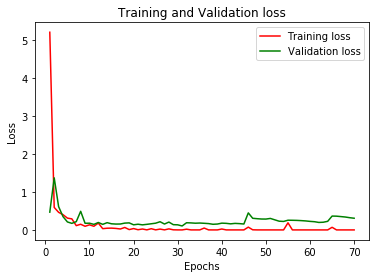

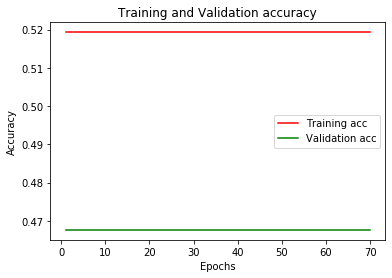

In [490]:
# plotting training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [491]:
# testing the model with given testing data
testLoss, testAccuracy = model.evaluate( X_test, y_test)

10/10 [==============================] - 2s 163ms/step - loss: 2.7452 - acc: 0.5000


In [492]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 2.7452292442321777
Testing accuracy  0.5


Note: Testing accuracy is just ~ 50% and hence we have bug area to improve it further. 

# 4. Evaluate the Default Model
Evaluate the trained CNN model on test data. Print classification results. [2 point]

In [493]:
#Get the classification report for default model 
from sklearn.metrics import classification_report 
Y_prediction = model.predict_classes(X_test)
Y_prediction = Y_prediction.reshape(1,-1)[0]
report = classification_report(y_test,Y_prediction,target_names = ['Masked','UnMasked'])
print (report)


              precision    recall  f1-score   support

      Masked       0.00      0.00      0.00       160
    UnMasked       0.50      1.00      0.67       160

    accuracy                           0.50       320
   macro avg       0.25      0.50      0.33       320
weighted avg       0.25      0.50      0.33       320



# 5. Model Improvization
Can you try to make changes in anyway in the CNN model and improve your test accuracy? Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model. Plot precision and recall for default and improved model in a single bar plot. [3 points]

# Lets try to optimize the model to perform better !

In [498]:
#Lets start with Normalization 
#The rescale=1./255 option normalizes the image pixel values to have zero mean and standard deviation of 1. 
#It helps your model to generally learn and update its parameters efficiently.
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [499]:
#Get the Image Generators
train_generator = train_datagen.flow(X_train,y_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_val,y_val,batch_size=batch_size)

In [503]:
#Lets call it as Improved_Model
Improved_model = models.Sequential()

Improved_model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(64,64,3)))
Improved_model.add(layers.MaxPooling2D((2,2)))

Improved_model.add(layers.Conv2D(64,(3,3), activation='relu'))
Improved_model.add(layers.Conv2D(64,(3,3), activation='relu'))
Improved_model.add(layers.MaxPooling2D((2,2)))

Improved_model.add(layers.Conv2D(128,(3,3), activation='relu'))
Improved_model.add(layers.Conv2D(128,(3,3), activation='relu'))
Improved_model.add(layers.MaxPooling2D((2,2)))

Improved_model.add(layers.Conv2D(256,(3,3), activation='relu'))
Improved_model.add(layers.MaxPooling2D((2,2)))


Improved_model.add(layers.Dropout(0.5)) #Regularization
Improved_model.add(layers.Flatten())
Improved_model.add(layers.Dense(32, activation='relu'))
Improved_model.add(layers.Dense(1, activation='sigmoid')) #Two classes : Mask & Unmask so Signoid would fit better instead of softmax
Improved_model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 9, 9, 128)       

In [504]:
Improved_model.compile(loss='binary_crossentropy',optimizer = "adam",metrics=['acc'])

In [505]:
#Training Now 
history = Improved_model.fit_generator(train_generator,
                             steps_per_epoch=ntrain // batch_size,
                             epochs=70,
                             validation_data=val_generator,
                             validation_steps=nval // batch_size)

Epoch 1/70
43/43 [==============================] - 46s 1s/step - loss: 0.6500 - acc: 0.5820 - val_loss: 0.4694 - val_acc: 0.8219
Epoch 2/70
43/43 [==============================] - 51s 1s/step - loss: 0.4043 - acc: 0.8443 - val_loss: 0.1601 - val_acc: 0.9500
Epoch 3/70
43/43 [==============================] - 50s 1s/step - loss: 0.2844 - acc: 0.8979 - val_loss: 0.1681 - val_acc: 0.9438
Epoch 4/70
43/43 [==============================] - 48s 1s/step - loss: 0.2713 - acc: 0.9135 - val_loss: 0.1596 - val_acc: 0.9344
Epoch 5/70
43/43 [==============================] - 43s 999ms/step - loss: 0.2254 - acc: 0.9184 - val_loss: 0.1842 - val_acc: 0.9281
Epoch 6/70
43/43 [==============================] - 39s 908ms/step - loss: 0.2588 - acc: 0.8932 - val_loss: 0.1484 - val_acc: 0.9500
Epoch 7/70
43/43 [==============================] - 40s 934ms/step - loss: 0.2783 - acc: 0.8901 - val_loss: 0.1565 - val_acc: 0.9531
Epoch 8/70
43/43 [==============================] - 40s 919ms/step - loss: 0.2420

In [506]:
# testing the model with Validation data
Improved_valLoss, Improved_valAccuracy = Improved_model.evaluate( X_val, y_val)

11/11 [==============================] - 3s 210ms/step - loss: 12.3880 - acc: 0.9682


In [507]:
print('Validation loss \t', Improved_valLoss)
print('Validation accuracy ', Improved_valAccuracy)

Validation loss 	 12.38796329498291
Validation accuracy  0.9682080745697021


In [508]:
#Get the keys to use for plotting 
history_dict = Improved_history.history
print(history_dict.keys()) #Print the available keys 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


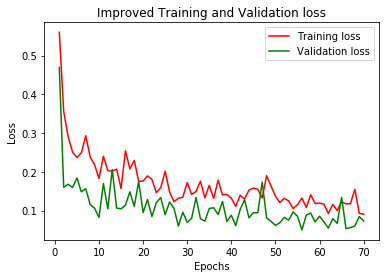

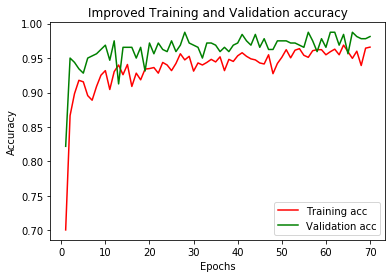

In [509]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Improved Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Improved Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [510]:
# testing the model with given testing data
Improved_testLoss, Improved_testAccuracy = Improved_model.evaluate( X_test, y_test)

10/10 [==============================] - 3s 241ms/step - loss: 28.1611 - acc: 0.9219


In [511]:
print('Testing loss \t', Improved_testLoss)
print('Testing accuracy ', Improved_testAccuracy)

Testing loss 	 28.161121368408203
Testing accuracy  0.921875


In [512]:
#Get the classification report for Improved model 
from sklearn.metrics import classification_report 
Y_prediction = Improved_model.predict_classes(X_test)
Y_prediction = Y_prediction.reshape(1,-1)[0]
Improved_report = classification_report(y_test,Y_prediction,target_names = ['Masked','UnMasked'])
print (Improved_report)

              precision    recall  f1-score   support

      Masked       0.92      0.93      0.92       160
    UnMasked       0.92      0.92      0.92       160

    accuracy                           0.92       320
   macro avg       0.92      0.92      0.92       320
weighted avg       0.92      0.92      0.92       320



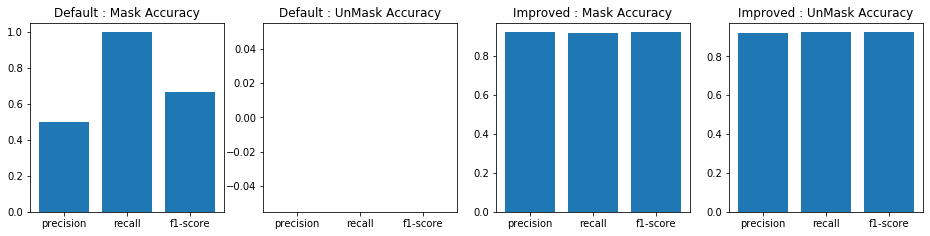

In [513]:
key_to_be_deleted = 'support' #We don;t need 160 as support data for printing for bar plot hence dropped

#Improved 
Y_prediction = Improved_model.predict_classes(X_test) #Get the prediction from Improved model 
Y_prediction = Y_prediction.reshape(1,-1)[0] #Reshape it
Improved_report = classification_report(y_test, Y_prediction, output_dict=True).items() #Get the improved classification report
Improved_df = pd.DataFrame(Improved_report).transpose() #Put the classification report into data frame
Improved_Mask_Accuracy = Improved_df[1][1] #Get the Mask Accuracy count
Improved_Unmask_Accuracy = Improved_df[0][1] #Get the Unmask Accuracy count
Improved_Mask_Accuracy.pop(key_to_be_deleted, None) #Remove support key entry from dictionary for mask accuracy 
Improved_Unmask_Accuracy.pop(key_to_be_deleted, None) #Remove support key entry from dictionary for Unmask accuracy

#Default 
Y_prediction = model.predict_classes(X_test)#Get the prediction from Improved model
Y_prediction = Y_prediction.reshape(1,-1)[0]#Reshape it
default_report  = classification_report(y_test, Y_prediction, output_dict=True).items()#Get the improved classification report
df = pd.DataFrame(default_report).transpose()#Put the classification report into data frame
default_Mask_Accuracy = df[1][1]#Get the Mask Accuracy count
default_Unmask_Accuracy = df[0][1]#Get the Unmask Accuracy count
default_Mask_Accuracy.pop(key_to_be_deleted, None)#Remove support key entry from dictionary for mask accuracy
default_Unmask_Accuracy.pop(key_to_be_deleted, None)#Remove support key entry from dictionary for Unmask accuracy

#Plot the Bar Graph
plt.figure(figsize=[16,16]) #Decide the total figure size

#Do subplots for all 4 graphs Mask & Unmask detection accuracy,precision & F1 for both default & Improved model

plt.subplot(4,4,1) 
plt.bar(range(len(default_Mask_Accuracy)), list(default_Mask_Accuracy.values()), align='center')
plt.xticks(range(len(default_Mask_Accuracy)), list(default_Mask_Accuracy.keys()))
plt.title('Default : Mask Accuracy')

plt.subplot(4,4,2)
plt.bar(range(len(default_Unmask_Accuracy)), list(default_Unmask_Accuracy.values()), align='center')
plt.xticks(range(len(default_Unmask_Accuracy)), list(default_Unmask_Accuracy.keys()))
plt.title('Default : UnMask Accuracy')

plt.subplot(4,4,3)
plt.bar(range(len(Improved_Mask_Accuracy)), list(Improved_Mask_Accuracy.values()), align='center')
plt.xticks(range(len(Improved_Mask_Accuracy)), list(Improved_Mask_Accuracy.keys()))
plt.title('Improved : Mask Accuracy')

plt.subplot(4,4,4)
plt.bar(range(len(Improved_Unmask_Accuracy)), list(Improved_Unmask_Accuracy.values()), align='center')
plt.xticks(range(len(Improved_Unmask_Accuracy)), list(Improved_Unmask_Accuracy.keys()))
plt.title('Improved : UnMask Accuracy')

#Show the final output
plt.show()

Note: Default Model for Unmask accuracy was 0 so no input in second sub-plot.With Sigmoid activaion (for default model), I was able to get output but going with inputs with assignments, I choose Softmax for default model. 